# Chapter 6 - Linear Model Inference

Joshua French

To open this information in an interactive Colab notebook, click the Open in Colab graphic below.

<a href="https://colab.research.google.com/github/jfrench/LinearRegression/blob/master/notebooks/06-linear-model-inference-notebook.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg"> </a>

------------------------------------------------------------------------

In [1]:
if(!require(palmerpenguins, quietly = TRUE)) {
  install.packages("palmerpenguins", repos = "https://cran.rstudio.com/")
  library(palmerpenguins)
}
if(!require(api2lm, quietly = TRUE)) {
  install.packages("apli2m", repos = "https://cran.rstudio.com/")
  library(api2lm)
}

# Overview of inference and prediction

------------------------------------------------------------------------

Inference and prediction are often intertwined, so we discuss them together.

*Inference* focuses on drawing conclusions about the data-generating distribution

-   The two primary types of statistical inference are confidence intervals and hypothesis tests.
-   The Estimation & Inference Appendix provides an overview of both confidence intervals and hypothesis tests in a more general context.

*Prediction* focuses on selecting a plausible value or range of values for an unobserved response.

-   Prediction often makes use of estimated parameters we find as part of the inferential process, though this isn’t required.

We will also introduce and discuss solutions for the multiple comparisons problem, which arises when we make multiple inferences or predictions simultaneously.

# Necessary notation

------------------------------------------------------------------------

The $t$ distribution is a symmetric bell-shaped distribution like the normal distribution but has a larger standard deviation.

-   The $t$ distribution has a degrees of freedom parameter, $\nu$.
-   $t_{\nu}$ denotes a random variable having a $t$ distribution with $\nu$ degrees of freedom.
    -   As the degrees of freedom of a $t$ random variable increases it behaves more and more similarly to a random variable with a standard normal distribution (a $\mathsf{N}(0,1)$ distribution).
-   $t_{\nu}^{\alpha}$ denotes the $1-\alpha$ quantile of a $t$ distribution with $\nu$ degrees of freedom.

The figure below displays the density of a $t$ distribution with 10 degrees of freedom while also indicating the 0.95 quantile of that distribution.

-   Additional information about the $t$ distribution is available on [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

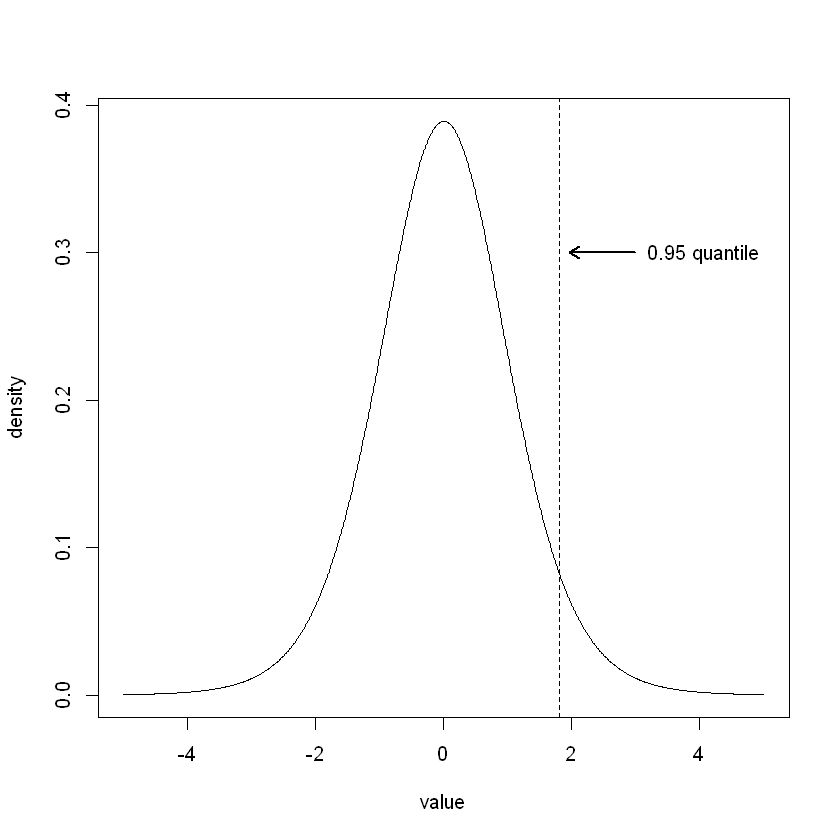

The $F$ distribution is characterized as the ratio of two independent chi-square random variables divided by their degrees of freedom.

-   It has a numerator degrees of freedom parameter, $\nu_1$, and a denominator degrees of freedom parameter, $\nu_2$.
-   The notation $F_{\nu_1, \nu_2}$ denotes a random variable having an $F$ distribution with $\nu_1$ numerator degrees of freedom and $\nu_2$ denominator degrees of freedom.
-   $F^{\alpha}_{\nu_1,\nu_2}$ denotes the $1-\alpha$ quantile of an $F$ random variables with $\nu_1$ numerator degrees of freedom and $\nu_2$ denominator degrees of freedom.
-   In fact, $[t_{\nu}]^2=F_{1,\nu}$, i.e., the square of a $t$ random variable with $\nu$ degrees of freedom is equivalent to an $F$ random variable with $1$ numerator degree of freedom and $\nu$ denominator degrees of freedom.

# Properties of the OLS estimator

------------------------------------------------------------------------

We assume:

-   $\mathbf{y} = \mathbf{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}$.

-   $\boldsymbol{\epsilon}\mid \mathbf{X}\sim \mathsf{N}(\mathbf{0}_{n\times 1},\sigma^2 \mathbf{I}_{n\times n})$.

This assumption applies to all errors, so we believe that all errors, observed and future, will have mean 0, variance $\sigma^2$, will be uncorrelated with other observations, and have a normal distribution.

Under these assumptions, we showed before that

-   $\mathbf{y}\mid \mathbf{X}\sim \mathsf{N}(\mathbf{X}\boldsymbol{\beta}, \sigma^2 \mathbf{I}_{n\times n})$.
-   $\hat{\boldsymbol{\beta}}\mid \mathbf{X} \sim \mathsf{N}(\boldsymbol{\beta}, \sigma^2(\mathbf{X}^T\mathbf{X})^{-1})$.

# Parametric confidence intervals for regression coefficients

**Standard $t$-based confidence intervals**

------------------------------------------------------------------------

Under the assumptions above, we can prove (though we won’t) that

$$
\frac{\hat{\beta}_j-\beta_j}{\hat{\mathrm{se}}(\hat{\beta}_j)}\sim t_{n-p}, \quad j=0,1,\ldots,p-1,
$$

where the estimated standard error of $\hat{\beta}_j$ is

$$
\hat{\mathrm{se}}(\hat{\beta}_j)=\hat{\sigma}(\mathbf{X}^T\mathbf{X})^{-1}_{j+1,j+1}.
$$

Recall that:

-   Estimated standard error is the estimated standard deviation of the sampling distribution of $\hat{\beta}_j$.
-   The notation $(\mathbf{X}^T\mathbf{X})^{-1}_{j+1,j+1}$ indicates the element in row $j+1$, column $j+1$, of the matrix $(\mathbf{X}^T\mathbf{X})^{-1}$.

$(\hat{\beta}_j-\beta_j)/\hat{\mathrm{se}}(\hat{\beta}_j)$ is a pivotal quantity with a $t$ distribution, and it can be used to derive a confidence interval.

A confidence interval for $\beta_j$ with confidence level $1-\alpha$ is given by the expression:

$$
\hat{\beta}_j \pm t^{\alpha/2}_{n-p} \hat{\mathrm{se}}(\hat{\beta}_j),\quad j=0,2,\ldots,p-1.
$$

It is critical to note that the $1-\alpha$ confidence level refers to the procedure for a single interval, not the family of intervals we can produce for all $p$ coefficients.

The `confint` function returns confidence intervals for the regression coefficients of a fitted model.

The `confint` function has 3 main arguments:

-   `object`: a fitted model (`lm`) object.
-   `parm`: a vector of numbers or names indicating the parameters for which we want to construct confidence intervals.
    -   By default, confidence intervals are constructed for all parameters.
-   `level`: the confidence level desired for the confidence interval.
    -   The default value is `0.95`, which will produce 95% confidence intervals.

We once again use the `penguins` data from the **palmerpenguins** package to illustrate what we have learned.

**Penguins example**

------------------------------------------------------------------------

Consider the regression model:

$$
\begin{aligned}
&E(\mathtt{bill\_length\_mm}\mid \mathtt{body\_mass\_g}, \mathtt{flipper\_length\_mm}) \\
&=\beta_0+\beta_1 \mathtt{body\_mass\_g} + \beta_2 \mathtt{flipper\_length\_mm}.
\end{aligned}
$$

We estimate the parameters of this model in R.

In [3]:
# load data
data(penguins, package = "palmerpenguins")
# fit model
mlmod <- lm(bill_length_mm ~ body_mass_g + flipper_length_mm,
            data = penguins)

We obtain the 95% confidence intervals for the 3 regression coefficients.

In [4]:
confint(mlmod)

The 95% confidence interval for the intercept parameter is \[-12.45, 5.58\]. We are 95% confident that the mean penguin bill length is between -12.25 and 5.58 mm for a penguin with a body mass of 0 g and a flipper length of 0 mm. (This really isn’t sensible).

The 95% confidence interval for the `body_mass_g` coefficient is \[-0.00046, 0.002\]. We are 95% confident the regression coefficient for `body_mass_g` is between -0.00046 and 0.002, assuming the `flipper_length_mm` regressor is also in the model.

If we wanted to get the 90% confidence interval for the `flipper_length_mm` coefficient by itself, we could use either of the commands shown below.

In [5]:
# two styles for determining the CI for a single parameter (at a 90% level)
confint(mlmod, parm = 3, level = 0.90)
confint(mlmod, parm = "flipper_length_mm", level = 0.90)

# The multiple comparisons problem

------------------------------------------------------------------------

Our linear models typically have multiple regression coefficients.

-   We typically want to construct confidence intervals for all of the coefficients.

The confidence level of the procedure described above is only valid for a single interval.

Since we are constructing multiple intervals, the simultaneous confidence level of the procedure for the family of intervals is less than $1-\alpha$.

This is an example of the multiple comparisons problem.

A **multiple comparisons problem** occurs anytime we make multiple inferences (confidence intervals, hypothesis tests, prediction intervals, etc.).

-   We are more likely to draw erroneous conclusions if we do not adjust for the fact that we are making multiple inferential statements.
-   E.g., a confidence interval procedure with level 0.95 will produce intervals that contain the target parameter with probability 0.95.
-   If we construct two confidence intervals with level 0.95, then the family-wise confidence level (i.e., the probability that both intervals simultaneously contain their respective target parameters) will be less than 0.95.
-   We can guarantee that our family-wise confidence level will be at least 0.90, but we can’t determine the exact value without more information

The **family-wise confidence level** is the probability that all intervals under consideration simultaneously contain their target parameter.

-   The family-wise confidence level is also known as the **simultaneous** or **overall** confidence level.

A **multiple comparisons procedure** is a procedure designed to adjust for multiple inferences.

-   E.g., a multiple comparisons procedure will produce a family of intervals that have a family-wise confidence level above some threshold.

**Adjusted confidence intervals for regression coefficients**

------------------------------------------------------------------------

Bonferroni (1936) proposed a simple multiple comparisons procedure that is applicable in many contexts. This general procedure is known as the **Bonferroni correction**.

Suppose we are constructing $k$ confidence intervals simultaneously. We control the family-wise confidence level of our intervals at $1-\alpha$ if we construct the individual confidence intervals with the level $1-\alpha/k$. We sketch a proof of this below.

Boole’s inequality (Boole, 1847) states that for a countable set of events $A_1, A_2, A_3 \ldots$,

$$P(\cup_{j=1}^\infty A_j) \leq \sum_{j=1}^\infty P(A_j).$$

This is a generalization of the fact that

$$
P(A \cup B) = P(A) + P(B) - P(A\cap B) \leq P(A) + P(B).
$$

for two events $A$ and $B$.

Suppose that we construct a family of $k$ confidence intervals with individual confidence level $1-\alpha/k$ (and all assumptions are satisfied.)

-   The probability that the confidence interval procedure for a specific interval doesn’t contain the target parameter is $\alpha/k$.

Then:

$$
\begin{aligned}
& P(\mbox{All }k\mbox{ intervals contain the target parameter}) \\
& = 1 - P(\mbox{At least one of the }k\mbox{ intervals misses the target parameter}) \\
& = 1 - P(\cup_{j=1}^k \mbox{interval }j\mbox{ misses the target parameter}) \\
& \geq 1 - \sum_{j=1}^k P(\mbox{interval }j\mbox{ misses the target parameter}) \\
& = 1 - k(\alpha/k) \\
&= 1-\alpha.
\end{aligned}
$$

Thus, the family-wise confidence level of all $k$ intervals is AT LEAST $1-\alpha$ when the Bonferroni correction is used.

The Bonferroni correction is known to be conservative, which means that the family-wise confidence level is typically much larger than $1-\alpha$.

-   Conservative methods can have low power.
-   i.e., Our intervals are much wider than they need to be, so we aren’t able to draw precise conclusions about the plausible values of our regression coefficients.

**Penguins example (continued)**

------------------------------------------------------------------------

Let’s construct simultaneous confidence intervals for our `penguins` example using the Bonferroni correction.

If we want to control the family-wise confidence level of our $k=3$ intervals at $0.95$, then $\alpha = 0.05$ and the Bonferroni correction suggests that we should construct the individual intervals at a confidence level of $1-0.05/3=0.983$.

We construct the Bonferroni-adjusted confidence intervals using the code below.

In [6]:
# Simultaneous 95% confidence intervals for mlmod
confint(mlmod, level = 1 - 0.05/3)

Alternatively, we can use the `confint_adjust` function from the **api2lm** package to construct this interval.

The `confint_adjust` function works almost identically to the `confint` function.

-   The `confint_adjust` function takes a `method` argument to indicate the type of adjustment to make when constructing the confidence intervals.
-   e.g., `method = "bonferroni"` will produce Bonferroni-corrected intervals.

In [7]:
confint_adjust(mlmod, method = "bonferroni")

Working and Hotelling (1929) developed another multiple comparisons procedure that can be used to preserve the family-wise confidence level of the intervals at $1-\alpha$.

The Working-Hotelling multiple comparisons procedure is valid for ALL linear combinations of the regression coefficients, meaning that we can construct an arbitrarily large number of confidence intervals for linear combinations of the regression coefficients with this procedure and the family-wise confidence level will be at least $1-\alpha$ (Weisberg, 2014).

The Working-Hotelling procedure guarantees that if we construct the individual confidence intervals in the following way, then the family-wise confidence level will be at least $1-\alpha$:

$$
\hat{\beta}_j \pm \sqrt{p F^\alpha_{p,n-p}} \hat{\mathrm{se}}(\hat{\beta}_j),\quad j=0,2,\ldots,p-1.
$$

The `confint_adjust` function from the **api2lm** package will produce these intervals when setting the `method` argument to `"wh"`. We construct Working-Hotelling-adjusted intervals with family-wise confidence level of at least 0.95 for the `penguins` example using the code below.

In [8]:
confint_adjust(mlmod, method = "wh")

In this example, the Bonferroni-adjusted intervals are narrower than the Working-Hotelling-adjusted intervals.

The Working-Hotelling intervals tends to be narrower for small $p$ (e.g., $p=1$ or $2$) and small $n-p$ (e.g., $n-p = 1$ or $2$) (Mi and Sampson, 1993).

As the number of intervals increases, the Working-Hotelling intervals will eventually be narrower than the Bonferroni-adjusted intervals.

# Prediction: mean response versus new response

It is common to make two types of predictions in a regression context:

-   Prediction of a mean response.
-   Prediction of a new response.

In either context, we want to make predictions with respect to a specific combination of regressor values, which we denote $\mathbf{x}_0$.

The mean response for a specific combination of regressors is denoted $E(Y\mid \mathbb{X}=\mathbf{x}_0)$.

We use the notation $Y(\mathbf{x}_0)$ to describe a new response for a specific combination of regressor values, $\mathbb{X}=\mathbb{x_0}$.

$E(Y\mid \mathbb{X}=\mathbf{x}_0)$ represents the average response when the regressor values are $\mathbf{x}_0$.

-   i.e., the number we would get if were able to determine the average of an infinite number of responses with regressor values being fixed at $\mathbf{x}_0$.

$Y(\mathbf{x}_0)$ represents the actual response we will will observe for a new observation with regressor values $\mathbf{x}_0$.

-   $Y(\mathbf{x}_0)$ represents the mean response for that combination of regressor values plus some error.
-   $Y(\mathbf{x}_0)=E(Y\mid \mathbb{X}=\mathbf{x}_0)+\epsilon(\mathbf{x}_0)$, where $\epsilon(\mathbf{x_0})$ denotes the error for our new observation.

**Example**

Suppose we want to rent a new apartment or buy a new house. If we look through the available listings, we will likely filter our search results by certain characteristics. We might limit our search to dwellings with 3 bedrooms, 2 bathrooms, that are within a certain distance of public transportation, and have a certain amount of square footage.

-   If we averaged the monthly rent or asking price of all the dwellings matching our specifications, then that would be an approximation of the mean response (we would need all the possible dwellings matching those considerations to get the true average).
-   This average would give us an idea of the “typical” price of dwellings with those characteristics.
-   On the other hand, we likely want to know the price of the dwelling we actually end up in. This is the “new response” we want to predict.

It is common to distinguish the two scenarios by using the terminology:

-   “Estimating the mean response” to refer to prediction of the the mean
-   “Prediction a new response” when we want to predict a new observation.

# Confidence interval for the mean response

Consider a typical linear regression model with $p$ regression coefficients given by:

$$
E(Y|\mathbb{X})=\beta_0+\beta_1 X_1 + \ldots \beta_{p-1} X_{p-1}
$$

We want to estimate the mean response for a specific combination of regressor values. The mean response for that combination of regressors is obtained via the equivalent expressions

$$
\begin{aligned}
E(Y\mid \mathbb{X}=\mathbf{x}_0) &= \beta_0 + \sum_{j=1}^{p-1}x_{0,j}\beta_j \\
&= \mathbf{x}_0^T \boldsymbol{\beta}.
\end{aligned}
$$

To simplify our notation, we drop the “$\mathbb{X}=$” in our discussion below, so $E(Y\mid \mathbb{X}=\mathbf{x}_0)\equiv E(Y\mid \mathbf{x}_0)$.

What does $E(Y\mid \mathbf{x}_0)$ represent? It represents the average response we will observe if we somehow managed to observe infinitely many responses with $\mathbb{X}=\mathbf{x}_0$.

The Gauss-Markov Theorem discussed before indicates that the best linear unbiased estimator of the mean response is given by the equation:

$$
\begin{aligned}
\hat{E}(Y\mid \mathbf{x}_0) &= \hat{\beta}_0 + \sum_{j=1}^{p-1}x_{0,j}\hat{\beta}_j \\
&= \mathbf{x}_0^T \hat{\boldsymbol{\beta}},
\end{aligned}
$$

which replaces the unknown, true coefficients by their OLS estimates.

We want to create a confidence interval for $E(Y\mid \mathbf{x}_0)$. If we divide the estimation error of the mean response, i.e., $E(Y\mid \mathbf{x}_0)-\hat{E}(Y\mid \mathbf{x}_0)$, by its estimated standard deviation, then we obtain a pivotal quantity. More specifically, we have:

$$
\frac{E(Y\mid \mathbf{x}_0)-\hat{E}(Y\mid \mathbf{x}_0)}{\sqrt{\hat{\mathrm{var}}\left(E(Y\mid \mathbf{x}_0)-\hat{E}(Y\mid \mathbf{x}_0)\right)}} = \frac{E(Y\mid \mathbf{x}_0)- \mathbf{x}_0 \hat{\boldsymbol{\beta}}}{ \hat{\mathrm{se}}(\mathbf{x}_0\hat{\boldsymbol{\beta}})}\sim t_{n-p}
$$

with:

$$
\hat{\mathrm{se}}(\mathbf{x}_0^T\hat{\boldsymbol{\beta}})=\hat{\sigma}\sqrt{\mathbf{x}_0^T (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{x}_0}. (\#eq:sehat-est-mean)
$$

A confidence interval for $E(Y\mid \mathbf{x}_0)$ with confidence level $1-\alpha$ is given by the expression:

$$
\mathbf{x}_0\hat{\boldsymbol{\beta}} \pm t^{\alpha/2}_{n-p} \hat{\mathrm{se}}(\mathbf{x}_0\hat{\boldsymbol{\beta}}). (\#eq:t-ci-mean-response)
$$

The `predict` function is a generic function used to make predictions based on fitted models. We can use this function to estimate the mean response for multiple combinations of predictor variables, compute the estimated standard error of each estimate, and obtain confidence intervals for the mean response. The primary arguments to the `lm` method for `predict` are:

-   `object`: A fitted model from the `lm` function.
-   `newdata`: A data frame of predictor values. All predictors used in the formula used to fit `object` must be provided. Each row contains the predictor values for the mean response we want to estimate. If this is not provided, then the fitted values for each observation are returned.
-   `se.fit`: A logical value indicating whether we want to explicitly compute the standard errors of each estimated mean, i.e., $\hat{\mathrm{se}}(\hat{E}(Y\mid \mathbf{x}_0))$ for each estimate.
-   `interval`: The type of interval to compute. The default is `none`, meaning no interval is provided. Setting `interval = "confidence"` will return a confidence interval for the mean response associated with each row of `newdata`. Setting `interval = "prediction"` will return a prediction interval for a new response, which we will discuss in the next section.
-   `level`: The confidence level of the interval.

Run `?predict.lm` in the Console for additional details about this function.

We will estimate the mean response for the parallel lines model previously fit to the `penguins` data. We do this to emphasize the fact that the `predict` function asks you to specify the values of the *predictor* variables for each estimate you want to make, not the complete set of regressors.

Recall we fit a parallel lines model to the `penguins` data that used both `body_mass_g` and `species` to explain the behavior of `bill_length_mm`. Letting $D_C$ denote the indicator variable for the `Chinstrap` level and $D_G$ denote the indicator variable for the `Gentoo` level, the fitted parallel lines model was:

$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species})\\
&= 24.92 + 0.004 \mathtt{body\_mass\_g} + 9.92 D_C + 3.56 D_G.
\end{aligned}
$$

We fit this model below, assigning it the name `lmodp`.

In [9]:
# fit parallel lines model to penguins data
lmodp <- lm(bill_length_mm ~ body_mass_g + species,
            data = penguins)
coef(lmodp)

Let’s estimate the mean response for the “typical” `body_mass_g` of each `species`. We compute the mean `body_mass_g` of each `species` using the code below, assigning the resulting data frame the name `newpenguins`. We use the `group_by` and `summarize` functions from the **dplyr** package \[@R-dplyr\] to simplify this process.

In [10]:
# mean body_mass_g of each species
newpenguins <- penguins |>
  dplyr::group_by(species) |>
  dplyr::summarize(body_mass_g = mean(body_mass_g, na.rm = TRUE))
newpenguins

We now have a data frame with variables for the two predictors, `species` and `body_mass_g` , used to fit `lmodp`. Each row of `newpenguins` contains the mean `body_mass_g` for each level of `species` and is suitable for use in the `predict` function.

In the code below, we estimate the mean `flipper_length_mm` based on the fitted model in `lmodp` for the mean `body_mass_g` of each level of `species`. We also choose to compute the estimated standard errors of each estimate by setting the `se.fit` argument to `TRUE`.

In [11]:
# estimate mean and standard error for 3 combinations of predictors
predict(lmodp, newdata = newpenguins, se.fit = TRUE)

An Adelie penguin with a body mass of 3700.662 g is estimated to have a mean flipper length of 38.79 mm with an estimated standard error of 0.196 mm. A Chinstrap penguin with a body mass of 3733.09 g is estimated to have a mean flipper length of 48.83 mm with an estimated standard error of 0.29 mm. A Gentoo penguin with a body mass of 5076.02 g is estimated to have a mean flipper length of 47.50 mm with an estimated standard error of 0.22 mm.

To create each 98% confidence intervals for the mean response for each combination of predictors, we specify `level = 0.98` and `interval = "confidence"` in the `predict` function in the code below.

In [12]:
predict(lmodp, newdata = newpenguins, level = 0.98, interval = "confidence")

The 98% confidence interval for the mean flipper length of an Adelie penguin with a body mass of 3700.662 g is \[38.33, 39.25\]. We are 98% confident that the mean flipper length of Adelie penguins with a body mass of 3700.662 is between 38.33 g and 39.25 g. Note: we are constructing a confidence interval for the mean flipper length of ALL Adelie penguins with this body mass, i.e., for:

$$
E(\mathtt{flipper\_length\_mm}\mid \mathtt{body\_mass\_g} = 3700.662, \mathtt{species} = \mathtt{Adelie}),
$$

which is an unknown characteristic of the population of all Adelie penguins. Similarly, the 98% confidence interval for the mean flipper length of Chinstrap penguins with a body mass of 3733.09 g is \[48.15, 49.52\]. Lastly, the mean flipper length of Gentoo penguins with a body mass of 5076.02 g is \[46.99, 48.02\].

We provide details about manually computing confidence intervals for the mean response in the Going Deeper section.

We are once again faced with a multiple comparisons problem because we are making 3 inferences. To control the family-wise confidence level of our intervals, we can use the Bonferroni or Working-Hotelling corrections previously discussed. Both corrections are implemented in the `predict_adjust` function in the **api2lm** package, which is intended to work identically to the `predict` function, but produces intervals that adjust for multiple comparisons. The only additional argument is `method`, with choices `"none"` (no correction), `"bonferroni"` (Bonferroni adjustment), or `"wh"` (Working-Hotelling adjustment). We produce both types of adjusted intervals in the code below. The Bonferroni-adjusted confidence intervals are slightly narrower in this example.

In [13]:
# bonferroni-adjusted confidence intervals for the mean response
predict_adjust(lmodp, newdata = newpenguins, level = 0.98,
               interval = "confidence", method = "bonferroni")
# working-hotelling-adjusted confidence intervals for the mean response
predict_adjust(lmodp, newdata = newpenguins, level = 0.98,
               interval = "confidence", method = "wh")

# Prediction interval for a new response

We once again assume the regression model:

$$
E(Y|\mathbb{X})=\beta_0+\beta_1 X_1 + \ldots \beta_{p-1} X_{p-1}.
$$

We want to predict a new response for a specific combination of regressor values, $\mathbf{x}_0$. The new response will be the mean response for that combination of regressors, $E(Y\mid \mathbf{x}_0)$, plus the error for that observation, $\epsilon(\mathbf{x}_0)$, i.e.:

$$
Y(\mathbf{x}_0)=E(Y\mid \mathbf{x}_0) + \epsilon(\mathbf{x}_0).
$$

Thus, our predicted new response, $\hat{Y}(\mathbf{x})$ is the estimated mean plus the estimated error, i.e.:

$$
\hat{Y}(\mathbf{x}_0)=\hat{E}(Y\mid \mathbf{x}_0) + \hat{\epsilon}(\mathbf{x}_0).
$$

We have already used $\hat{E}(Y\mid \mathbf{x}_0)=\mathbf{x}_0^T\hat{\boldsymbol{\beta}}$ as the estimator for $E(Y\mid \mathbf{x}_0)$ since it is the best linear unbiased estimator according to the Gauss-Markov theorem. What should we use for $\hat{\epsilon}(\mathbf{x}_0)$? In short, because all of the errors, $\epsilon_1, \epsilon_2,\ldots, \epsilon_n, \epsilon(\mathbf{x}_0)$ are uncorrelated, our best guess is the mean value of the errors, which is zero. This is not true when the errors are correlated, but we do not discuss that in detail. Thus, the best predictor of a new response is:

$$
\begin{aligned}
\hat{Y}(\mathbf{x}_0) &=\hat{E}(Y\mid \mathbf{x}_0) + \hat{\epsilon}(\mathbf{x}_0)\\
&= \mathbf{x}_0^T\hat{\boldsymbol{\beta}} + 0 \\
&= \mathbf{x}_0^T\hat{\boldsymbol{\beta}}.
\end{aligned}
$$

We want to create a prediction interval for $Y(\mathbf{x}_0)$. A prediction interval is basically the same thing as a confidence interval, but the interval estimator is for a random variable instead of a parameter. If we divide the estimation error of the new response, i.e., $Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0)$, by its estimated standard deviation, $\widehat{\mathrm{sd}}(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0))$, then we obtain a $t$-distributed pivotal quantity:

$$
\frac{Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0)}{\widehat{\mathrm{sd}}(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0))} \sim t_{n-p}
$$

where:

$$
\widehat{\mathrm{sd}}(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0))=\hat{\sigma}\sqrt{1 + \mathbf{x}_0^T (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{x}_0}
$$

The standard deviation of the prediction error is sometimes known as the **standard error of prediction**, but we do not use that terminology. A detailed derivation of $\widehat{\mathrm{sd}}(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0))$ is provided in the Going Deeper section.

There is a conceptual and mathematical relationship between the standard deviation of the estimation error for the mean response and the prediction error for a new observation. If we compare the expression for $\hat{\mathrm{se}}(\hat{E}(Y\mid \mathbf{x}_0)) - E(Y\mid \mathbf{x}_0))$ in the first equation and $\widehat{\mathrm{sd}}(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0))$ in the second equation, we see that $\widehat{\mathrm{sd}}(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0))$ has an extra “1 +” under the square root. Because of this, *prediction intervals for a new response are always wider than a confidence interval for the mean response* when considering the same regressor values, $\mathbf{x}_0$, and confidence level. Conceptually, prediction intervals are wider because there are two sources of uncertainty in our prediction: estimating the mean response and predicting the error of the new response. Estimating the mean response does not require us to predict the error of a new response, so the uncertainty of our estimate is less. We can see that this is formally true through the derivations provided in the Going Deeper section.

A prediction interval for $Y(\mathbf{x}_0)$ with confidence level $1-\alpha$ is given by the expression:

$$
\mathbf{x}_0\hat{\boldsymbol{\beta}} \pm t^{\alpha/2}_{n-p} \hat{\mathrm{sd}}(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0))
$$

The `predict` function can be used to create predictions and prediction intervals for a new response in the same way that it can be used to estimate the mean response and produce associated confidence intervals. If the `interval` argument is `"none"`, then predictions for a new response are returned. As we have already seen, $\hat{E}(Y\mid \mathbf{x}_0)$ and $\hat{Y}(\mathbf{x}_0)$ are the same number. If the `interval` argument is `"prediction"`, then the predicted new response and associated prediction interval will be produced for each row of data supplied to the `newdata` argument.

Continuing the example from before, we want to predict the response value for new, unobserved penguins having the observed mean `body_mass_g` for each level of `species`. The fitted model is stored in `lmodp` and the data frame with the predictors for the new responses is stored in `newpenguins`. We print the coefficients of the fitted model and the data frame of new predictors below for clarity.

In [14]:
coef(lmodp)
newpenguins

In the code below, we predict the `flipper_length_mm` for new penguins for the predictor values stored in `newpenguins` based on the fitted model in `lmodp`. We also construct the associated 99% prediction intervals.

In [15]:
# predict new response and compute prediction intervals
# for 3 combinations of predictors
predict(lmodp, newdata = newpenguins,
        interval = "prediction", level = 0.99)

An new Adelie penguin with a body mass of 3700.662 g is predicted to have a flipper length of 38.79 mm. We are 99% confident that a new Adelie penguins with a body mass of 3700.662 g will have a flipper length between 32.54 mm and 45.04 mm. Similarly, the 99% prediction interval for the flipper length of a new Chinstrap penguin with a body mass of 3733.09 g is \[48.56, 55.11\]. The flipper length of a new Gentoo penguin with a body mass of 5076.02 g is between 41.25 and 53.75 with a confidence level of 0.99.

Since we are making 3 predictions, our inferences suffer from the multiple comparisons problem. To control the family-wise confidence level of our intervals, we can use the Bonferroni correction with $k=3$. The Working-Hotelling correction does not apply to new responses. However, a similar adjustment proposed by Scheffé does apply \[@alsm2005\]. The prediction interval multiplier $t^{\alpha/2}_{n-p}$ used for a single prediction interval with confidence level $1-\alpha$ is replaced by $\sqrt{k F^{1-\alpha}_{k,n-p}}$ to control the family-wise confidence level at $1-\alpha$ for a family of $k$ prediction intervals. Recall that the Working-Hotelling multiplier was $\sqrt{p F^{1-\alpha}_{p,n-p}}$. Thus, the Scheffé multiplier scales with the number of predictions being made while the Working-Hotelling multiplier scales with the number of estimated regression coefficients in the fitted model.

Both the Bonferroni and Scheffé multiple comparisons corrections are implemented in the `predict_adjust` function in the **api2lm** package. In the prediction interval setting, we can choose the correction `method` argument to be `"none"` (no correction), `"bonferroni"` (Bonferroni adjustment), or `"scheffe"` (Scheffe adjustment). We produce both types of adjusted intervals in the code below. The Bonferroni-adjusted confidence intervals are slightly narrower in this example.

In [16]:
# bonferroni-adjusted prediction intervals for new responses
predict_adjust(lmodp, newdata = newpenguins, level = 0.99,
               interval = "prediction",
               method = "bonferroni")
# sheffe-adjusted prediction intervals for new responses
predict_adjust(lmodp, newdata = newpenguins, level = 0.99,
               interval = "prediction",
               method = "scheffe")

# Hypothesis tests for a single regression coefficient

If we assume we are fitting the multiple linear regression model in Equation @ref(eq:model-def-inference), then our model has $p$ regression coefficient $\beta_0, \beta_1, \ldots, \beta_{p-1}$. How would we perform a hypothesis test for exactly one of these regression coefficients?

Recall that if we make the assumptions in Equation @ref(eq:error-assumption-inference), then

Let’s say we wish to test whether, for this model, $\beta_j$ differs from some constant number $c$ (typically, $c=0$). Let $\boldsymbol{\beta}_{-j}=\boldsymbol{\beta}\setminus{\beta_j}$, i.e., $\boldsymbol{\beta}_{-j}$ is the vector of all regression coefficients except $\beta_j$. $\boldsymbol{\beta}_{-j}$ has $p-1$ elements. We can state the hypotheses we wish to test as

$$
\begin{aligned}
H_0: \beta_j &= c \mid \boldsymbol{\beta}_{-j}\in\mathbb{R}^{p-1} \\
H_a: \beta_j &\neq c \mid \boldsymbol{\beta}_{-j}\in\mathbb{R}^{p-1}
\end{aligned}
$$

The first part of the null hypothesis in Equation @ref(eq:betaj-H0Ha) states that $\beta_j = c$ while the first part of the alternative hypothesis assumes that $\beta_j \neq c$. But what does the second half of the hypotheses mean? The vertical bar means “assuming or conditional on”, similar to the notation you would see in conditional probabilities or distributions. What this means is that we are performing the hypothesis test while assuming that the other coefficients are some real number (possibly even zero). Why state this at all? Isn’t it implicitly assumed? No. We could perform a hypothesis test for $\beta_j$ for many different models that have differing regressors. By writing out hypotheses in the style of Equation @ref(eq:betaj-H0Ha), we are being very clear that we are performing a test for $\beta_j$ in the context of the model that has the regressors associated with $\boldsymbol{\beta}_{-j}$.

How do the hypotheses in Equation @ref(eq:betaj-H0Ha) affect the pivotal quantity in Equation @ref(eq:pivot-t-betaj)? Under the null hypothesis, the statistic:

$$
T_j = \frac{\hat{\beta}_j-c}{\hat{\mathrm{se}}(\hat{\beta}_j)} \sim t_{n-p}
$$

Thus, the null distribution of $T_j$ is a $t$ distribution with $n-p$ degrees of freedom. We emphasize that this is only true if the assumptions in Equation @ref(eq:error-assumption-inference) are true.

The p-value associated with this test is computed via the equation:

$$
p\text{-value} = 2P(t_{n-p}\geq |T_j|).
$$

What if we wished to test a one-sided hypothesis? The p-value for a lower-tailed test is $p\text{-value}=P(t_{n-p}\leq T_j)$ while the p-value for an upper-tailed test is $p\text{-value}=P(t_{n-p}\geq T_j)$.

The fitted model $$
\begin{aligned}
&E(\mathtt{bill\_length\_mm}\mid \mathtt{body\_mass\_g}, \mathtt{flipper\_length\_mm}) \\
&=\beta_0+\beta_1 \mathtt{body\_mass\_g} + \beta_2 \mathtt{flipper\_length\_mm}.
\end{aligned}
$$

is assigned the name `mlmod`. Suppose we want to test

$$
\begin{aligned}
H_0: &\beta_1 = 0 \mid \beta_0\in \mathbb{R}, \beta_2 \in \mathbb{R} \\
H_a: &\beta_1 \neq 0 \mid \beta_0\in \mathbb{R}, \beta_2 \in \mathbb{R}.
\end{aligned}
$$ R conveniently provides this information in the output of the `summary` function (specifically, the `coefficients` element if we don’t want extra information). We extract this information from the `mlmod` object in the code below.

In [17]:
summary(mlmod)$coefficients

Moving from left to right, the first column (no name) indicates the coefficient term under consideration, the second column (`Estimate`) provides the estimated coefficients, the third column (`Std. Error`) provides the estimated standard error ($\hat{\mathrm{se}}(\hat{\beta}_j)$) for each coefficient, the fourth column (`t value`) provides the test statistic associated with testing $H_0: \beta_j = 0 \mid \boldsymbol{\beta}_{-j} \in \mathbb{R}^{p-1}$ versus a suitable alternative for each coefficient, while the final column (`Pr(>|t|)`) provides the two-tailed p-value associated with this test.

Thus, for our test of the `body_mass_g` coefficient, the test statistic is $T_2 = 1.17$ and the associated p-value is 0.024. There is moderate evidence that the coefficient for `body_mass_g` differs from zero, assuming the model also allows for the inclusion of the intercept and `flipper_length_mm` coefficients.

## Hypothesis tests for multiple regression coefficients

Suppose we have have a standard linear regression model with $p$ regression coefficients such as the one defined in Equation @ref(eq:model-def-inference). We refer to this model as the “Complete Model”.

We want to compare the Complete Model to a “Reduced Model” that is a special case of the Complete Model. The most common examples of Reduced Model are:

1.  All of the coefficients except the intercept are set to zero.
2.  Some of the coefficients are set to zero.

Less commonly considered examples of a Reduced Model set certain coefficients equal to each other or place other restrictions on the coefficients. We emphasize that the Reduced Model is a special case of the Complete Model. Alternatively, this relationship is sometimes described by saying the Reduced Model is *nested* in the Complete Model.

Let $RSS(RM)$ denote the RSS of the Reduced Model and $RSS(CM)$ denote the RSS of the Complete Model. Similarly, $df(RM)$ and $df(CM)$ denote the degrees of freedom associated with the RSS for the Reduced and Complete Models, respectively. Recall that the degrees of freedom associated with a RSS is simply $n$, the number of observations used to fit the model, minus the number of estimated regression coefficients in the model being considered.

We want to perform a hypothesis test involving multiple regression coefficients in our model. Without be specific or developing complex notation, we cannot be precise in stating the hypotheses we wish to test. In the discussion below, we use RM as an abbreviation for the Reduced Model and CM as an abbreviation for the Complete Model. A general statement of the hypotheses we will test are:

$H_0: \text{RM is an adequate model for describing the population}$

$H_a: \text{FM is a more appropriate model for describing the population.}$

We wish to statistically assess whether we can simplify our model to $RM$. If $RM$ doesn’t adequately explain the patterns of the data, then we will conclude that $FM$ is a more appropriate model.

If we assume that the assumptions in Equation @ref(eq:error-assumption-inference) are true for $RM$ and that $RM$ is the true model, then

$$
F=\frac{\frac{RSS_{RM}-RSS_{FM}}{df_{RM}-df_{FM}}}{\frac{RSS_{FM}}{df_{FM}}}=\frac{\frac{RSS_{RM}-RSS_{FM}}{df_{RM}-df_{FM}}}{\hat{\sigma}^2_{FM}}\sim F_{df_{RM}-df_{FM},df_{FM}}
$$

where $F_{df_{RM}-df_{FM},df_{FM}}$ is an $F$ random variable with $df_{RM}-df_{FM}$ numerator degrees of freedom and $df_{FM}$ denominator degrees of freedom and $\hat{\sigma}^2_{FM}$ is the estimated error variance of $FM$.

The p-value for this test is

$$
p\text{-value}=P(F\geq F_{df_{RM}-df_{FM},df_{FM}}).
$$ We consider two common uses for this test below.\`

**Test for a regression relationship**

------------------------------------------------------------------------

The most common test involving multiple parameters is to test whether *any* of the non-intercept regression coefficients different from zero.

The is known as the “test for a regression relationship”.

In this situation, the hypotheses to be tested may be stated as

$H_0: E(Y \mid \mathbb{X}) = \beta_0$ $H_a: E(Y\mid \mathbb{X})) = \beta_0 + X_1\beta_1 + \cdots + X_{p-1}\beta_{p-1}.$

Alternatively, we can state these hypotheses as

$H_0: \beta_1 = \cdots = \beta_{p-1} = 0 \mid \beta_0 \in \mathbb{R}$ $H_a: \beta_0 \in \mathbb{R}, \beta_1 \in \mathbb{R}, \ldots, \beta_{p-1}\in \mathbb{R}$.

Notice that the Reduced Model in $H_0$ is clearly a special case of the Complete Model with most of the regression coefficients set equal to zero. Notice that we specifically conditioned are hypotheses on the intercept coefficient, $\beta_0$ being included in both models we are comparing. We want to choose between the models specified in $H_0$ and $H_a$.

The $F$ statistic in Equation @ref(eq:f-stat-lh) used for this test simplifies dramatically when performing a test for a regression relationship.Using a bit of calculus or by carefully using the OLS estimator of the regression coefficients, it is possible to show that for the Reduced Model that $\hat{\beta}_0=\bar{Y}$. Thus, for the $RSS_R = \sum_{i=1}^n (Y_i - \bar{Y})^2$, which is the definition of the TSS defined in Chapter @ref(linear-model-estimation)! Then the numerator of our F statistic becomes $TSS - RSS_C$, which is mathematically equivalent to the regression sum of squares for the Complete Model. The degrees of freedom of $RSS_R = n - 1$. Similarly, the degrees of freedom of $RSS_C = n - p$. Thus $df_R - df_C = (n - 1) - (n - p) = p-1$. Thus, our F statistic for this test simplifies to

$$
F = \frac{SS_{reg}(CM)/(p-1)}{RSS(CM)/(n-p)}= \frac{SS_{reg}(CM)/(p-1)}{\hat{\sigma}^2_{CM}}.
$$

# Going Deeper

**Manual calculation of the $t$-based confidence interval**

Consider the summary of the fitted linear model below, which summarizes a first-order linear model fit to the `penguins` data earlier in this chapter.

In [18]:
summary(mlmod)

If we want to manually produce 95% confidence intervals for the true regression coefficients for this model using Equation @ref(eq:t-ci-betas), then we need to acquire some basic information. We need:

-   the estimated regression coefficients
-   the degrees of freedom for the fitted model $n-p$
-   the $1-\alpha/2$ quantile of a $t$ random variable with $n-p$ degrees of freedom
-   the estimated standard error of the estimated regression coefficients.

The estimated regression coefficients can be extracted from our fitted model, `mlmod`, using the `coef` function. We extract and print the estimated coefficients using the code below while simultaneously assigning the vector the name `betahats`.

In [19]:
# extract estimated coefficients from mlmod
(betahats <- coef(mlmod))

The degrees of freedom $n-p$ is referred to as the residual degrees of freedom and can be obtained by using the `df.residual` function on the fitted model. Using the code below, we see that the residual degrees of freedom is 339 (this information was also in the summary of the fitted model).

In [20]:
df.residual(mlmod)

To construct a 95% confidence interval for our coefficients, we need to determine the $0.975$ quantile of a $t$ random variable with 339 degrees of freedom. This can be found using the `qt` function, as is done in the code below. We assign this value the name `mult`. Notice that value is a bit above 1.96, which is the value often seen in introductory statistics courses for confidence intervals based on the standard normal distribution ($\mathsf{N}(0,1)$ distribution).

In [21]:
(mult <- qt(0.975, df = 339))

The estimated standard errors of each coefficient are shown in the summary of the fitted model. They are (approximately) 4.58, 0.00057, and 0.032 and can be obtained by extracting the 2nd column of the `coefficients` element produced by the `summary` function.

In [22]:
(sehats <- summary(mlmod)$coefficients[,2])

A alternative approach is to use 3 step process below:

1.  Use the `vcov` function to obtain the estimated variance matrix of $\hat{\boldsymbol{\beta}}$, i.e., $\hat{\mathrm{var}}(\hat{\boldsymbol{\beta}})$.
2.  Use the `diag` function to extract the diagonal elements of this matrix, which gives us $\hat{\mathrm{var}}(\hat{\beta}_0), \hat{\mathrm{var}}(\hat{\beta}_1), \ldots, \hat{\mathrm{var}}(\hat{\beta}_{p-1})$.
3.  Use the `sqrt` function to calculate the estimated standard errors from the estimated variances of the estimated coefficients.

We use this process in the code below, which returns the same estimated standard errors we previously obtained.

In [23]:
# 2nd approach to obtaining estimated standard errors
sqrt(diag(vcov(mlmod)))

Using the estimated coefficients (`betahats`), the appropriate quantile of the $t$ distribution (`mult`), and the estimated standard errors (`sehats`), we can manually produce the standard t-based confidence intervals using the code below.

In [24]:
data.frame(lb = betahats - mult * sehats,
           ub = betahats - mult * sehats)

**Details about estimation of the mean response**

------------------------------------------------------------------------

Consider the estimated mean response for a specific combination of regressor values, denoted by $\mathbf{x}_0$, so that:

$$
\hat{E}(Y\mid \mathbf{x}_0)=\mathbf{x}_0^T\hat{\boldsymbol{\beta}}
$$

Using some of the matrix-related results from Appendix @ref(prob-review) and the result in Equation @ref(eq:prop-betahat), we can determine that:

$$
\begin{aligned}
\mathrm{var}\left(\hat{E}(Y \mid \mathbf{x}_0)\right) &= \mathrm{var}(\mathbf{x}_0^T \hat{\boldsymbol{\beta}}) \\
&= \mathbf{x}_0^T \mathrm{var}(\hat{\boldsymbol{\beta}})\mathbf{x}_0\\
&= \sigma^2 \mathbf{x}_0^T (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{x}_0.
\end{aligned}
$$

To get the simplest expression for the confidence interval for $E(Y\mid\mathbf{x}_0)$, we have to make a number of connections that are often glossed over. We discuss them explicitly. Since the error variance, $\sigma^2$, in Equation @ref(eq:var-est-mean-response) isn’t known, we replace it with the typical estimator $\hat{\sigma}^2=RSS/(n-p)$ to get:

$$
\hat{\mathrm{var}}\left(\hat{E}(Y\mid\mathbf{x}_0)\right)=\hat{\sigma}^2 \mathbf{x}_0^T (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{x}_0
$$

The standard error of an estimator is the standard deviation of the estimator’s variance, so we have $\mathrm{se}\left(\hat{E}(Y\mid\mathbf{x}_0)\right)=\sqrt{\mathrm{var}\left(\hat{E}(Y\mid \mathbf{x}_0)\right)}$. Similarly, we have that the estimated standard error for $\hat{E}(Y\mid \mathbf{x}_0)$ is $\hat{\mathrm{se}}\left(\hat{E}(Y\mid\mathbf{x}_0)\right)=\sqrt{\hat{\mathrm{var}}\left(\hat{E}(Y\mid \mathbf{x}_0)\right)}$. Taking the square root of Equation @ref(eq:est-var-mean), we see that:

$$
\hat{\mathrm{se}}\left(\hat{E}(Y\mid \mathbf{x}_0)\right)=\hat{\sigma} \sqrt{\mathbf{x}_0^T (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{x}_0}.
$$

Additionally, since $E(Y\mid \mathbf{x}_0)$ is an (unknown) constant, we also have that:

$$\mathrm{var}\left(E(Y\mid \mathbf{x}_0)-\hat{E}(Y\mid \mathbf{x}_0)\right)=\mathrm{var}\left(\hat{E}(Y\mid \mathbf{x}_0)\right).
$$

If we divide the estimation error of the mean response, i.e., $E(Y\mid \mathbf{x}_0)-\hat{E}(Y\mid \mathbf{x}_0)$, by its estimated standard deviation, then we obtain a pivotal quantity. More specifically, we have:

$$
\frac{E(Y\mid \mathbf{x}_0)-\hat{E}(Y\mid \mathbf{x}_0)}{\sqrt{\hat{\mathrm{var}}\left(E(Y\mid \mathbf{x}_0)-\hat{E}(Y\mid \mathbf{x}_0)\right)}} = \frac{E(Y\mid \mathbf{x}_0)- \mathbf{x}_0 \hat{\boldsymbol{\beta}}}{ \hat{\mathrm{se}}(\mathbf{x}_0\hat{\boldsymbol{\beta}})}\sim t_{n-p}.
$$

**Manual calculation of confidence intervals for the mean response**

------------------------------------------------------------------------

We discuss manual computation of the estimated mean response and associated confidence interval for a particular combination of regressor values based on the `penguins` example discussed in Section @ref(parametric-ci-mean-response).

Specifically, we estimate the mean response for the fitted parallel lines model given by$$
\begin{aligned}
&\hat{E}(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species})\\
&= 24.92 + 0.004 \mathtt{body\_mass\_g} + 9.92 D_C + 3.56 D_G,
\end{aligned}
$$ where $D_C$ and $D_G$ denote the indicator variables for the `Chinstrap` and `Gentoo` levels of the `species` variable. This fitted model is stored in `lmodp`. The estimated coefficients are shown in the code below.

In [25]:
coef(lmodp)

We want to estimate the mean response for the following combination of predictors stored in the `newpenguins` data frame, which is printed in the code below.

In [26]:
# mean body_mass_g of each species
newpenguins

We want to use the `newpenguins` data frame to generate the matrix of regressors used to estimate the associated mean responses. We can create the matrix of regressors using the `model.matrix` function. The main arguments of `model.matrix` are:

-   `object`: an object of the appropriate class. In our case, it is a formula or fitted model.
-   `data`: a data frame with the predictors needed to construct the matrix.

We need only the right side of the formula used to fit the model in `lmodp` to create our matrix of regressor values. We can use the `formula` function to extract the formula used to fit `lmodp`. We then use `model.matrix` to create the matrix of regressor by values needed for estimating the mean. The matrix produced by `model.matrix`, `X0`, includes a column for the intercept term and the indicator variables in `lmodp`.

In [27]:
# determine formula used to fit lmodp
formula(lmodp)
# create matrix of regressor values from newpenguins
(X0 <- model.matrix(~ body_mass_g + species, data = newpenguins))

We can obtain the estimated mean by taking the product of `X0` and the estimated coefficients for `lmodp`. We assign the estimated mean responses the name `est_means`.

In [28]:
(est_means <- X0 %*% coef(lmodp))

We now use Equation @ref(eq:sehat-est-mean) to get the estimated standard error of each estimated mean response. First, we use `model.matrix` to extract the original matrix of regressors, $\mathbf{X}$, from the fitted model `lmodp`. The `sigma` function is used to extract $\hat{\sigma}$ from `lmodp`. Each *row* of `X0` contains a particular instance regressor values. In the code below, we extract each row of `X0`, and then use Equation @ref(eq:sehat-est-mean) to compute the estimated standard error associated with each estimated mean response; these are assigned the names `se1`, `se2`, and `se3`. That approach isn’t scalable, so we provide a scalable version of these computations that is assigned the name `sehat`.

In [29]:
# original matrix of regressors
X <- model.matrix(lmodp)
sigmahat <- sigma(lmodp)
# compute estimated standard error for each estimated mean response
# crossprod(X) = t(X) %*% X
(sehat1 <- sigmahat * sqrt(t(X0[1,]) %*% solve(crossprod(X), X0[1,])))
(sehat2 <- sigmahat * sqrt(t(X0[2,]) %*% solve(crossprod(X), X0[2,])))
(sehat3 <- sigmahat * sqrt(t(X0[3,]) %*% solve(crossprod(X), X0[3,])))
# scalable computation of estimated standard errors
(sehat <- sigmahat * sqrt(diag(X0 %*% solve(crossprod(X), t(X0)))))

To finish the computation of our confidence intervals, we determine the correct multiplier, $t_{n-p}^{\alpha/2}$. For a 98% confidence interval, $\alpha = 0.02$ and $\alpha/2 = 0.01$. The degrees of freedom, $n-p$, is 338 (as shown in the code below). So the multiplier can be represented as $t_{338}^{0.01}$, which is the $0.99$ quantile of a $t$ distribution with 338 degrees of freedom. We provide this information to the `qt` function, which provides the quantiles of a $t$ distribution, using the code below to get the correct multiplier.

In [30]:
# degrees of freedom, n-p
df.residual(lmodp)
# multiplier for confidence interval
(mult <- qt(0.99, df = df.residual(lmodp)))

Thus, our 98% confidence intervals for each mean response can be computed using the code below, which matches the results we obtained in Section @ref(parametric-ci-mean-response).

In [31]:
data.frame(lb = est_means - mult * sehat,
           ub = est_means + mult * sehat)

### Details about prediction interval for a new response

We want to predict the value of a new response for a specific combination of regressor values, $\mathbf{x}_0$. The value of the new response is denoted by $Y(\mathbf{x}_0)$ and its prediction by $\hat{Y}(\mathbf{x}_0)$.

In Section @ref(pi-new-response), we briefly discussed that the new response may be written as:

$$
Y(\mathbf{x}_0) = E(Y \mid \mathbf{x}_0) + \epsilon(\mathbf{x}_0),
$$

and that the predicted new response, under our standard assumptions, is given by:

$$
\hat{Y}(\mathbf{x}_0)=\mathbf{x}_0^T\hat{\boldsymbol{\beta}}.
$$

Using these relationships, we can determine that the variance of the prediction error for a new response is given by:

$$
\begin{aligned}
\mathrm{var}\left(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0)\right) &= \mathrm{var}(Y(\mathbf{x}_0)-\mathbf{x}_0^T \hat{\boldsymbol{\beta}}) \\
&= \mathrm{var}(\mathbf{x}_0^T\boldsymbol{\beta} + \epsilon(\mathbf{x}_0)-\mathbf{x}_0^T \hat{\boldsymbol{\beta}}) \\
\end{aligned}
$$

Recall from Appendix @ref(prob-review) that the variance of a constant plus a random variable is equal to the variance of the random variable (since a constant doesn’t vary!). Thus, Equation @ref(eq:var-pred-error1) simplifies to:  

$$
\mathrm{var}\left(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0)\right) = \mathrm{var}(\epsilon(\mathbf{x}_0)-\mathbf{x}_0^T \hat{\boldsymbol{\beta}})
$$

Using results from Appendix @ref(prob-review) related to the variance of a sum of random variables, we have that:

$$
\begin{aligned}
&\mathrm{var}\left(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0)\right) \\
&= \mathrm{var}(\epsilon(\mathbf{x}_0)-\mathbf{x}_0^T \hat{\boldsymbol{\beta}}) \\
&= \mathrm{var}\left(\epsilon(\mathbf{x}_0)\right)+\mathrm{var}(-\mathbf{x}_0^T \hat{\boldsymbol{\beta}}) + 2\mathrm{cov}\left(\epsilon(\mathbf{x}_0), -\mathbf{x}_0^T \hat{\boldsymbol{\beta}}\right) \\
&= \mathrm{var}\left(\epsilon(\mathbf{x}_0)\right)+(-1)^2\mathrm{var}(\mathbf{x}_0^T \hat{\boldsymbol{\beta}}) - 2\mathrm{cov}\left(\epsilon(\mathbf{x}_0), \mathbf{x}_0^T \hat{\boldsymbol{\beta}}\right) \\
&= \mathrm{var}\left(\epsilon(\mathbf{x}_0)\right)+\mathrm{var}(\mathbf{x}_0^T \hat{\boldsymbol{\beta}}) - 2\mathrm{cov}\left(\epsilon(\mathbf{x}_0), \mathbf{x}_0^T \hat{\boldsymbol{\beta}}\right).
\end{aligned}
$$

The covariance term in the final line of Equation @ref(eq:var-pred-error3) is 0 because $\epsilon(\mathbf{x}_0)$ and $\mathbf{x}_0^T\hat{\boldsymbol{\beta}}$ are uncorrelated. Why are they uncorrelated? Recall that $\epsilon(\mathbf{x}_0), \epsilon_1, \ldots, \epsilon_n$ are uncorrelated. Also, recall that $\hat{\boldsymbol{\beta}}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$. Since $\mathbf{y}=[Y_1,Y_2,\ldots,Y_n]$ and $Y_i=\mathbf{x}_i^T\boldsymbol{\beta} + \epsilon_i$ for $i=1,2,\ldots,n$, the “randomness” of $\mathbf{x}_0^T\hat{\boldsymbol{\beta}}$ comes from $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$. Since $\epsilon(\mathbf{x}_0)$ is uncorrelated with $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$, we conclude that $\epsilon(\mathbf{x}_0)$ and $\mathbf{x}_0^T\hat{\boldsymbol{\beta}}$ are uncorrelated, so their covariance is zero. Thus, we have:

$$
\begin{aligned}
\mathrm{var}\left(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0)\right)
=\mathrm{var}\left(\epsilon(\mathbf{x}_0)\right)+\mathrm{var}(\mathbf{x}_0^T \hat{\boldsymbol{\beta}}) .
\end{aligned}
$$

From our assumptions in Section @ref(properties-betahat), we have that $\mathrm{var}(\epsilon(\mathbf{x}_0))=\sigma^2$. We determined in Section @ref(mean-response-calculations) that:

$$
\mathrm{var}(\mathbf{x}_0^T\hat{\boldsymbol{\beta}})=\sigma^2 \mathbf{x}_0^T (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{x}_0.
$$

Using these two facts, we can conclude that:

$$
\begin{aligned}
\mathrm{var}\left(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0)\right)
&=\sigma^2 + \sigma^2 \mathbf{x}_0^T (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{x}_0\\
&=\sigma^2\left(1 + \mathbf{x}_0^T (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{x}_0\right)
\end{aligned}
$$

Replacing $\sigma^2$ by the typical estimator $\hat{\sigma}^2=RSS/(n-p)$ to get the estimated variance of the prediction error and taking the square root of the estimated variance to get the estimated standard deviation of the prediction error, we have that:

$$
\widehat{\mathrm{sd}}\left(Y(\mathbf{x}_0)-\hat{Y}(\mathbf{x}_0)\right) = \hat{\sigma}\sqrt{1 + \mathbf{x}_0^T (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{x}_0}
$$

# References

Bonferroni, Carlo. 1936. “Teoria Statistica Delle Classi e Calcolo Delle Probabilita.” Pubblicazioni Del R Istituto Superiore Di Scienze Economiche e Commericiali Di Firenze 8: 3–62.

Boole, George. 1847. The Mathematical Analysis of Logic. Philosophical Library.

Kutner, Michael H, Christopher J Nachtsheim, John Neter, and William Li. 2005. Applied Linear Statistical Models, 5th Edition. McGraw-Hill/Irwin, New York.

Mi, Jie, and Allan R. Sampson. 1993. “A Comparison of the Bonferroni and Scheffé Bounds.” Journal of Statistical Planning and Inference 36 (1): 101–5. https://doi.org/https://doi.org/10.1016/0378-3758(93)90105-F.

Wasserman, Larry. 2004. All of Statistics: A Concise Course in Statistical Inference. Vol. 26. Springer.

Weisberg, Sanford. 2014. Applied Linear Regression. Fourth. Hoboken NJ: Wiley. http://z.umn.edu/alr4ed.

Working, Holbrook, and Harold Hotelling. 1929. “Applications of the Theory of Error to the Interpretation of Trends.” Journal of the American Statistical Association 24 (165A): 73–85. https://doi.org/10.1080/01621459.1929.10506274.